# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [2]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [3]:
med_charges = pd.read_csv('data/insurance2.csv')

In [4]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ *Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before*.

__A:__ To compute the 95% confidence interval lower limit, we sample with replacement the charges of the hospital and we compute the mean of the sample (mean replicates). We repeat this procedure 10000 times. We obtain a list of the mean replicates that can give us an idea about the distribution of the sample mean. From this approximate distribution of the sample mean, we compute the 5th percentile, in order to obtain the required confidence interval.

In [6]:
np.random.seed(47)
N_rep = 10000

charges = med_charges["charges"]
# Initialize the list of the mean replicates
bs_mean_replicates = np.empty(N_rep)

for i in range(N_rep):
    # Draw a random sample with replacement
    bs_sample = np.random.choice(charges, len(charges))
    # Compute the mean od the drawn sample
    bs_mean_replicates[i] = np.mean(bs_sample)

# Compute the lowerlimit of 95% confidence interval
lb_conf_interval = np.percentile(bs_mean_replicates, 5)

print("The lower limit of the 95% confidence interval is:", lb_conf_interval)

The lower limit of the 95% confidence interval is: 12724.467921704


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ *Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why*.

__A:__ To find the 95% confidence interval for the difference in standard deviations between the two groups, we sample with replacement from each group, we compute the standard deviation of the samples of each group and then compute the difference in the computed standard deviation. We repeat this experiment 10000 times.

In [14]:
np.random.seed(47)

insurance = med_charges.loc[med_charges.insuranceclaim == 1, 'charges']
no_insurance = med_charges.loc[med_charges.insuranceclaim == 0, 'charges']

# Initialize the array for the replicates of standrd deviation differences
bs_difstd_replicates = np.empty(N_rep)

for i in range(N_rep):
    # Draw a random sample from each group
    bs_sample_insurance = np.random.choice(insurance, len(insurance))
    bs_sample_noinsurance = np.random.choice(no_insurance, len(no_insurance))
    # Compute the difference in standard deviation of each group
    bs_difstd_replicates[i] = np.std(bs_sample_insurance, ddof=1) - np.std(
        bs_sample_noinsurance, ddof=1)

# Compute the 95% CI by computing the 2.5% and 97.5% percentiles
conf_interval = np.percentile(bs_difstd_replicates, [2.5, 97.5])

print("The 95% confidence interval is:", conf_interval)

The 95% confidence interval is: [6683.99830927 8506.64904158]


We plot the histogram of the differences in standard deviations with the locations of the 2.5% and 97.5% percentiles.

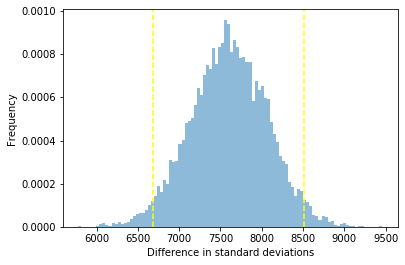

In [28]:
_ = plt.hist(bs_difstd_replicates, bins=100, alpha=0.5, density=True)
_ = plt.xlabel('Difference in standard deviations')
_ = plt.axvline(conf_interval[0], linestyle='--', color='yellow')
_ = plt.axvline(conf_interval[1], linestyle='--', color='yellow')
_ = plt.ylabel('Frequency')
plt.show()

The null hypothesis here assumes that there is no difference between the standard deviations of insurance and non-insurance claim charges. On the other hand, the alternate hypothesis assumes that there is a difference between the standard deviations. We see that the confidence interval is above zero, which means that we reject the null hypothesis.

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ *Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level*.

__A:__ In this question, we are going to test if there is a difference between the means of insured and non-insured medical charges. In this case, we have the following hypotheses:
- Null Hypothesis: There is no difference between the means of insured and non insured charges;
- Alternate Hypothesis: There is a difference between the means of insured and non insured charges.

From the given data, we have observed a difference in the means between the two groups. To know whether to reject or retain the null hypothesis, we compute the probability of obtaining a difference in the means at least as extreme as the observed one given that null hypothesis is true. We are going to use a bootstrapped approach to find this probability. To simulate the possible differences in means we could have obtained if the null hypothesis were true, we shift the charges of each group so that both group have the same mean. We then sample from each of the shifted group and compute the difference between the means of the drawn samples. We repeat this procedure 10000 times. At the end, we obtain a list of the replicates of the difference in means from which we find the p-value, by computing the proportion of obtained differences that are greater or equal to the observed difference (in absolute value).

In [30]:
seed(47)

# Shift each group so that both groups have the same mean
insurance_shifted = insurance - np.mean(insurance) + np.mean(charges)
no_insurance_shifted = no_insurance - np.mean(no_insurance) + np.mean(charges)

# Initialize the list that is going to store the differences between the means
bs_difmean_replicates = np.empty(N_rep)

for i in range(N_rep):
    # Draw a random sample from each shifted group of charges
    sample_insurance = np.random.choice(
        insurance_shifted, len(insurance_shifted))
    sample_no_insurance = np.random.choice(
        no_insurance_shifted, len(no_insurance_shifted))
    # Comute the differences in means
    bs_difmean_replicates[i] = np.mean(
        sample_no_insurance)-np.mean(sample_insurance)

# Compute the p-value
p = sum(np.abs(bs_difmean_replicates) >= np.abs(
    np.mean(no_insurance)-np.mean(insurance)))/len(bs_difmean_replicates)
print("The obtained p-value is:", p)

The obtained p-value is: 0.0


We see here that the p-value is extremely low. Therefore, we reject the null hypothesis.

__Q:__ *To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)*

__A:__ We plot the histogram of the bootstrapped differences and the locations of the observed differences.

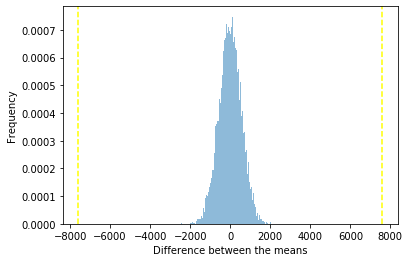

In [32]:
_ = plt.hist(bs_difmean_replicates, bins=100, alpha=0.5, density=True)
_ = plt.xlabel('Difference between the means')
_ = plt.axvline(np.mean(no_insurance)-np.mean(insurance),
                linestyle='--', color='yellow')
_ = plt.axvline(-np.mean(no_insurance)+np.mean(insurance),
                linestyle='--', color='yellow')
_ = plt.ylabel('Frequency')
plt.show()

We see that the observed differences between the means are very rare events under the null hypothesis, this is why the p-value is extremely low (close to 0). Note that we are considering the observed differences and its opposite values (i.e., we are considering the positive and negative of the absolute observed differences). This is because we are interested in testing if there is any difference (positive or negative) between the means of each group, we are not interested in knowing which mean is higher.  

__Q:__ *Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?*

__A:__ The p-value we obtained in the first test was pvalue=4.461230231620717e-31. This means that to observe a random difference as large as that we did observe, we need at least $10^{31}$ bootstap replicates, which might be very time consuming and we are going to still reject the null hypothesis.

__Q:__ *Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?*

__A:__ In the previous question, we rejected the null hypothesis that stated that there is no difference between the standard deviations of insured and non-insured charges. Therefore, we would now use the second variant of the t-test, i.e., the variant that considered that the variances of each group are not equal.

__Q:__ *If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?*

__A:__ We have the following hypotheses:
- Null Hypothesis:  There is no difference between the click-through rates of the current and new algorithm;
- Alternate Hypothesis: The click-through rates are higher with the new algorithm. 

We have to perform here a one-sided test, because we are interested in knowing which algorithm is better in terms of the number of click-through rates. If we reject the null hypothesis, we have two scenarios. If the null hypothesis were not the truth, then we might be considering a better algorithm than the current one, which will attract more users to click on it. On the other hand, if the null hypothesis were the truth and we rejected it, then we are going to consider a new algorithm that is not better than the current one. This might be bad in the case where the new algorithm uses more resources (power or memory) than the current algorithm.

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.